## Binomial Distribution

- How is PMF computed?
- Stock market case study: Using binomial distribution to answer business 

Imagine we wanted to find out the probability of finding 2 defective peices in a lot of 5, if the probability of finding a single defective piece is 0.3.

In [ ]:
#!pip install ipywidgets

In [1]:
from itertools import combinations

In [2]:
s1 = [f'p{i}' for i in range(1,6)]

In [3]:
s1

['p1', 'p2', 'p3', 'p4', 'p5']

In [4]:
comb = combinations(s1,2)

In [5]:
s=0
for i in comb:
    print(i)
    s=s+1
print(s)

('p1', 'p2')
('p1', 'p3')
('p1', 'p4')
('p1', 'p5')
('p2', 'p3')
('p2', 'p4')
('p2', 'p5')
('p3', 'p4')
('p3', 'p5')
('p4', 'p5')
10


In [6]:
import math

In [7]:
math.comb(5,2)

10

In [8]:
### Stock market case study
import pandas as pd
url = "https://raw.githubusercontent.com/Gunnvant/Self-Paced-Content/main/python/live_sessions/stats_decision_making/notebooks/stock_price_data_with_date.csv"
df = pd.read_csv(url)

In [9]:
df.head(2)

,Date,adaniports,asianpaints,axisbank,cipla,tcs
0,01/01/08,1296.85,1123.19,972.55,211.10,1054.55
1,02/01/08,1307.45,1135.45,1034.65,218.85,1050.00


In [10]:
### Find out how the priceshave been across these stocks?
df_melt=pd.melt(df.drop("Date",axis=1))

In [11]:
df_melt.head(2)

,variable,value
0,adaniports,1296.85
1,adaniports,1307.45


<Axes: title={'center': 'value'}, xlabel='variable'>

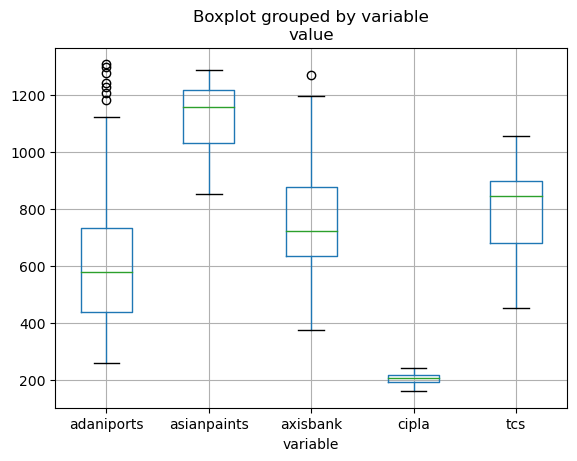

In [12]:
df_melt.boxplot(column="value",by="variable")

In [13]:
### What does this tell us?
### Which stock is less risky?
### Which stocks have a higher chance of upside?

In [14]:
## Imagine that your risk appetite is 20%, at what price would you buy stock of, eg cipla?
## Assume that past behaviour of the stock will also hold in future
df['cipla']

0      211.10
1      218.85
2      216.35
3      213.65
4      212.65
        ...  
241    181.05
242    181.95
243    184.00
244    183.90
245    186.60
Name: cipla, Length: 246, dtype: float64

In [15]:
## At what price, if you buy this stock will the price be higher than the bought price 80% of the time?
import ipywidgets as widgets
from ipywidgets import interact, interactive

In [16]:
def get_price(price,col):
    num = df[df[col]>price].shape[0]
    den = df.shape[0]
    print(f"Probability that if {col} is bought at {round(price,2)}, the price will be higher than {round(price,2)} is {round(num/den,2)}")

In [17]:
col = "cipla"
interactive(get_price,col=col,price=widgets.FloatSlider(min=df[col].min(),max=df[col].max()))

interactive(children=(FloatSlider(value=160.1, description='price', max=240.7, min=160.1), Text(value='cipla',…

**In class excercise** 

- Do the same excercise using other stocks
- Can you think of any other way to do the same task without using this hit and trial method?

In [18]:
### Find the probability of positive price change
df['cipla_1d_delta']=df['cipla']-df['cipla'].shift()

In [19]:
### Find how many days the change in cipla's price was positive

In [21]:
df[df['cipla_1d_delta']>0].shape[0]

123

In [22]:
df.shape[0]

246

In [23]:
probs = {'cipla_positive':(123/246)}

In [24]:
probs

{'cipla_positive': 0.5}

### Using Binomial Distributiion on this data

- What will be the probability that if we sample 10 days randomly from this dataset, the price change will be positive for exactly 7 days?

In [25]:
from scipy.stats import binom

In [26]:
binom.pmf(7,10,0.5)

0.11718749999999999

### Class Excercise repeat the same excercise with the other stocks as well

In [27]:
##todo

**DIY**

The probability that a randomly chosen sales prospect will make a purchase is 0.20. If a sales representative calls on six propects, what is the probability that exactly four sales will be made?

**DIY**

The probability that a randomly selected salaried employee is a participant in an optional retirement program is 0.40. If five salaried employees are chosen randomly, what is the probability that the proportion of participants is exactly 0.60?